<a href="https://colab.research.google.com/github/1221206/Parameter-Estimation-Li-ion-cells-by-EIS/blob/main/Parametrisation_Warburg_impeadance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
from scipy.optimize import curve_fit,least_squares
import numpy as np
import pickle  # serialize, deserialize
import os  # navigation
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/

Mounted at /content/gdrive/
/content/gdrive/MyDrive


In [ ]:
eis = pd.read_excel('EIS_80SoC_30.xlsx')


In [ ]:
case1 = eis.iloc[:,0:3].values

In [ ]:
W = case1[:,0] *2*np.pi
R = case1[:,1]
X = -case1[:,2]


In [ ]:
R


array([0.0153377, 0.0154233, 0.0155101, 0.0155961, 0.0156961, 0.0157873,
       0.0158994, 0.015995 , 0.0160886, 0.0162086, 0.0163229, 0.0164142,
       0.0165146, 0.0166229, 0.0167484, 0.0168415, 0.0169333, 0.0170271,
       0.0171408, 0.0172532, 0.0173123, 0.0174491, 0.0175114, 0.0175798,
       0.0176482, 0.0177433, 0.0178091, 0.017873 , 0.0179293, 0.0179869,
       0.0180448, 0.0180807, 0.0181281, 0.0181805, 0.018202 , 0.0182338,
       0.0182679, 0.0182892, 0.0183176, 0.0183317, 0.0183594, 0.0183797,
       0.0183942, 0.018415 , 0.0184255, 0.0184444, 0.0184538, 0.0184632,
       0.0184867, 0.0184994, 0.0185069, 0.0185135, 0.0185194, 0.0185361,
       0.0185418, 0.0185552, 0.0185602, 0.0185767, 0.0185848, 0.0186012,
       0.0186066, 0.01862  , 0.0186337, 0.0186464, 0.0186542, 0.018673 ,
       0.0186872, 0.0187014, 0.0187191, 0.0187414, 0.0187528, 0.0187859,
       0.0188033, 0.0188257, 0.0188529, 0.0188764, 0.0189051, 0.0189337,
       0.0189622, 0.0190064, 0.0190355, 0.0190852, 

In [ ]:
R1 = R.copy()
t = np.c_[R1,X]
t.shape

(100, 2)

In [ ]:
# def warburg_real(x, w, r, X):
#   #x = [R0,R1,C1,A]
#     Z = (x[1]*(np.sqrt(w)) + x[3] - 1j*x[3]) / ((1j*w*x[2])*((x[1]*np.sqrt(w))+x[3])+ x[3]*w*x[2]+np.sqrt(w))

#     Zreal = Z.real + x[0]
#     Zimag = Z.imag

#     return torch.stack((Zreal, -Zimag), dim=1)

# warburg parallel with capacitor

def warburg_real(x, w, r, X):
  #x = [R0,R1,C1,A]
    denom = (x[3]*w*x[2] + np.sqrt(w))**2 + (w**2)*(x[2]**2)*((x[1]*np.sqrt(w) + x[3])**2)

    Zreal = (((x[1]*np.sqrt(w) + x[3])*(x[3]*w*x[2]+np.sqrt(w))+ (x[3]*w*x[2])*(x[1]*np.sqrt(w)+ x[3]))/(denom)) + x[0]
    Zimag = (w*x[2]*((x[1]*np.sqrt(w)+ x[3])**2) + x[3]*(x[3]*w*x[2]+ np.sqrt(w)))/(denom)

    return torch.stack((Zreal, Zimag), dim=1)

import torch
import torch.optim as optim


def loss_function(prediction, target):
    return torch.sum((prediction[:,0] - target[:,0]) ** 2 + (prediction[:,1] - target[:,1]) ** 2)  # unweighted

    #return torch.sum(((prediction[:,0] - target[:,0]) ** 2 + (prediction[:,1] - target[:,1]) ** 2)/(target[:,0] ** 2 + target[:,1] ** 2)) # amplitude weight

  # return torch.sum(((prediction[:,0] - target[:,0])/target[:,0]) ** 2 + ((prediction[:,1] - target[:,1])/target[:,1]) ** 2) # parametric weight

params = torch.tensor([0.01,0.01,0.1,0.0001], requires_grad=True)

target = torch.tensor(t, requires_grad=True)

optimizer = optim.Adam([params], lr=.001)

W1 = torch.tensor(case1[:,0] * 2 * np.pi)
R1 = torch.tensor(case1[:,1])
X1 = torch.tensor(-case1[:,2])

for _ in range(1000):
    # Forward pass
    prediction = warburg_real(params, W1, R1, X1)

    loss = loss_function(prediction, target)
    print(loss)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Optimized parameters:", params)

tensor(0.0009, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0007, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0005, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0004, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0002, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0001, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(8.4717e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.8315e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.0591e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(2.4603e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(3.8838e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.7202e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(4.7331e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(5.5629e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(6.9358e-05, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(7.3404e-05, dtype=torch.float64, grad_fn=<SumBackward0>)


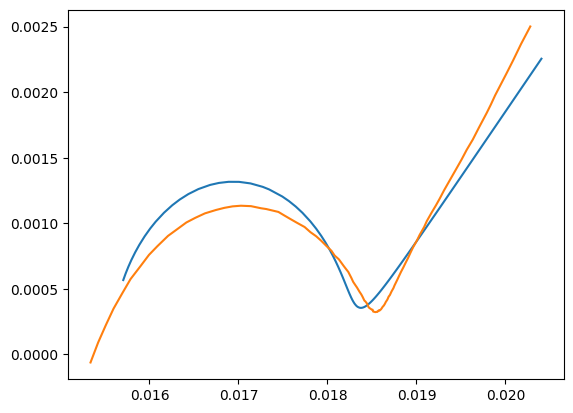

In [ ]:
# optimum_value= result.x
def warburg_chk(x, w):
  #x = [R0,R1,C1,A]
    x = x.detach().numpy()

    denom = (x[3]*w*x[2] + np.sqrt(w))**2 + (w**2)*(x[2]**2)*((x[1]*np.sqrt(w) + x[3])**2)

    Zreal = ((x[1]*np.sqrt(w) + x[3])*(x[3]*w*x[2]+np.sqrt(w))+ (x[3]*w*x[2])*(x[1]*np.sqrt(w)+ x[3]))/(denom) + x[0]
    Zimag = (w*x[2]*((x[1]*np.sqrt(w)+ x[3])**2) + x[3]*(x[3]*w*x[2]+ np.sqrt(w)))/denom

    return Zreal,Zimag

Zre, neg_Zim = warburg_chk(params, W)
plt.plot(Zre, neg_Zim)
plt.plot(R, X)

In [ ]:
def loss_function(prediction, target):
    return torch.sum((prediction[:,0] - target[:,0]) ** 2 + (prediction[:,1] - target[:,1]) ** 2)  # unweighted

    #return torch.sum(((prediction[:,0] - target[:,0]) ** 2 + (prediction[:,1] - target[:,1]) ** 2)/(target[:,0] ** 2 + target[:,1] ** 2)) # amplitude weight

  # return torch.sum(((prediction[:,0] - target[:,0])/target[:,0]) ** 2 + ((prediction[:,1] - target[:,1])/target[:,1]) ** 2) # parametric weight


In [ ]:
# with regularization

params = torch.tensor([0.01,0.01,0.1,0.0001], requires_grad=True)  # r0,r1,c1,a
# Define your target value (example)
target = torch.tensor(t , requires_grad=True, dtype=torch.float32)          # requires_grad=true for Adam

# Define an optimizer
optimizer = optim.Adam([params], lr=.001)

W1 = torch.tensor(case1[:,0] * 2 * np.pi, dtype=torch.float32)
R1 = torch.tensor(case1[:,1], dtype=torch.float32)
X1 = torch.tensor(-case1[:,2], dtype=torch.float32)

lambda_reg= 0.01
# Optimization loop
for _ in range(1000):
    # Forward pass: compute predicted value by passing data through the model
    prediction = warburg_real(params, W1, R1, X1)

    # Compute the loss
    loss = loss_function(prediction, target)
    total_loss = loss + lambda_reg*(torch.sum(params**2))
    print(total_loss)    # print(loss) for Adam, loss.item() fro SGD

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

print("Optimized parameters:", params)

tensor(0.0010, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0005, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<AddBackward0>)
tensor(0.0001, grad_fn=<A

In [ ]:
# Compute the Hessian matrix using torch.autograd.functional.hessian
def loss_with_regularization(params, W1, R1, X1, target, lambda_reg):
    prediction = warburg_real(params, W1, R1, X1)
    loss = loss_function(prediction, target)
    l2_reg = lambda_reg * torch.sum(params ** 2)
    total_loss = loss + l2_reg
    return total_loss

final_loss = loss_with_regularization(params, W1, R1, X1, target, lambda_reg)
hessian_matrix = torch.autograd.functional.hessian(lambda p: loss_with_regularization(p, W1, R1, X1, target, lambda_reg), params)

# Calculate the covariance matrix as the inverse of the Hessian
covariance_matrix = torch.inverse(hessian_matrix)

print("Covariance matrix:", covariance_matrix)

# Calculate standard errors and relative errors
standard_errors = torch.sqrt(torch.diag(covariance_matrix))
relative_errors = (standard_errors / params) * 100  # Error % as a percentage

print("Standard errors:", standard_errors)
print("Relative errors (%):", relative_errors)

Covariance matrix: tensor([[ 9.9671e-02, -9.4092e-02,  1.1976e+00, -3.8404e-03],
        [-9.4092e-02,  9.6613e-02, -1.0154e+00, -2.4002e-03],
        [ 1.1976e+00, -1.0154e+00,  3.6090e+01, -1.4008e-01],
        [-3.8405e-03, -2.4002e-03, -1.4008e-01,  1.8724e-02]])
Standard errors: tensor([0.3157, 0.3108, 6.0075, 0.1368])
Relative errors (%): tensor([ 2329.3218,  7338.5620, 17558.4102,  6621.5361],
       grad_fn=<MulBackward0>)
